In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import pandas as pd
import pandas_profiling
import plotly.graph_objects as go

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Netflix%20daily%20top%2010/netflix%20daily%20top%2010.csv")

In [5]:
df.drop_duplicates()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [6]:
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [7]:
df.shape

(7100, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [9]:
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [10]:
df['Year to Date Rank']=df['Year to Date Rank'].replace('-',0)
df['Last Week Rank']=df['Last Week Rank'].replace('-',0)
df['Netflix Exclusive']=df['Netflix Exclusive'].fillna('NO')
df.isnull().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

In [11]:
df['Year to Date Rank']=df['Year to Date Rank'].astype('int64')
df['Last Week Rank']=df['Last Week Rank'].astype('int64')
df['Netflix Release Date']=pd.to_datetime(df['Netflix Release Date'])
df['As of']=pd.to_datetime(df['As of'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   int64         
 3   Last Week Rank        7100 non-null   int64         
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     7100 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 554.8+ KB


In [12]:
df.describe()

,Rank,Year to Date Rank,Last Week Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,5.500000,4.439296,1.737324,24.123662,122.790141
std,2.872484,3.041267,2.620020,58.473789,213.861642
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,2.000000,0.000000,3.000000,19.000000
50%,5.500000,4.000000,0.000000,7.000000,50.000000
75%,8.000000,7.000000,3.000000,18.000000,128.000000
max,10.000000,10.000000,10.000000,428.000000,1474.000000


In [13]:
profiling = pandas_profiling.ProfileReport(df)
profiling.to_file("profiling.html")
profiling

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Days In Top 10', ylabel='Viewership Score'>

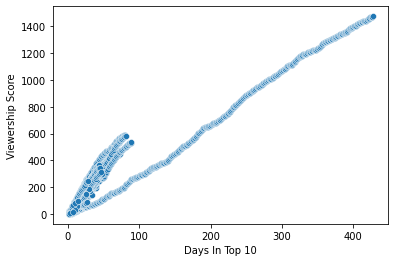

In [14]:
sns.scatterplot(data=df, x=df['Days In Top 10'], y=df['Viewership Score'])

<AxesSubplot:xlabel='Days In Top 10', ylabel='Viewership Score'>

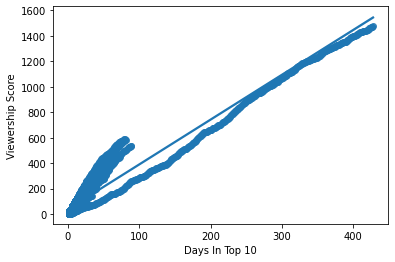

In [15]:
sns.regplot(data=df, x=df['Days In Top 10'], y=df['Viewership Score'])

In [16]:
dd=np.corrcoef(df['Viewership Score'],df['Days In Top 10'])
dd[1, 0]

0.9624135870948405

<AxesSubplot:xlabel='Type', ylabel='count'>

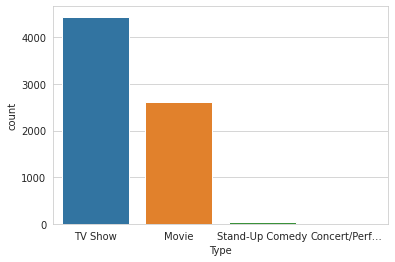

In [17]:
sns.set_style('whitegrid')
sns.countplot(data=df,x=df['Type'])

In [18]:
tv_shows=df[df['Type']=='TV Show']
tv_shows_top=tv_shows.groupby('Title')['Days In Top 10'].max().sort_values(ascending=False)[0:11]
tv_shows_top

Title
Cocomelon               428
Ozark                    89
Cobra Kai                81
Manifest                 80
The Queenâs Gambit     73
Outer Banks              72
Squid Game               66
All American             66
Bridgerton               58
Lucifer                  57
Virgin River             55
Name: Days In Top 10, dtype: int64

In [19]:
tv=tv_shows.groupby('Title').max()
tv=tv.sort_values(by='Days In Top 10',ascending=False)[:51]
tv_report = tv.groupby('Netflix Exclusive').count()
labels = ['NO','YES']
values= tv_report['Days In Top 10']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [20]:
xx=tv_shows.groupby('Title').max()
xx=xx.sort_values(by='Days In Top 10',ascending=False)
xx=xx[:11]
tv_report = xx.groupby('Netflix Exclusive').count()
labels = ['NO','YES']
values= tv_report['Days In Top 10']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [21]:
movies=df[df['Type']=='Movie']
movies_top=movies.groupby(df['Title'])['Days In Top 10'].max().sort_values(ascending=False)
movies_top[0:11]

Title
The Mitchells vs. The Machines    31
How the Grinch Stole Christmas    29
Vivo                              29
365 Days                          28
Despicable Me 2                   27
Donât Look Up                   26
The Christmas Chronicles 2        24
Illumination Presents The G…      24
We Can Be Heroes                  24
Red Notice                        23
The Unforgivable                  22
Name: Days In Top 10, dtype: int64

In [24]:
mov=movies.groupby(df['Title']).max()
mov=mov.sort_values(by='Days In Top 10',ascending=False)
mov=mov[:51]
movie_report = mov.groupby(['Netflix Exclusive']).count()
labels = ['NO','YES']
values= movie_report['Days In Top 10']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [25]:
mov=movies.groupby(df['Title']).max()
mov=mov.sort_values(by='Days In Top 10',ascending=False)
mov=mov[:11]
movie_report = mov.groupby(['Netflix Exclusive']).count()
labels = ['NO','YES']
values= movie_report['Days In Top 10']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [26]:
stand_up=df[df['Type']=='Stand-Up Comedy']
stand_up_top=stand_up.groupby(df['Title'])['Days In Top 10'].max().sort_values(ascending=False)
stand_up_top=pd.DataFrame(stand_up_top)
stand_up_top

,Days In Top 10
Title,
Dave Chappelle: The Closer,16
Kevin Hart: Zero F**ks Given,10
George Lopez: Weâll Do It f…,5
Jerry Seinfeld: 23 Hours to…,5
Chris DâElia: No Pain,3
Bo Burnham: Inside,2


In [27]:
zz=stand_up.groupby(df['Title']).max()
zz=zz.sort_values(by='Days In Top 10',ascending=False)
stand_up_report = zz.groupby(['Netflix Exclusive']).count()
stand_up_report['percentage'] = (stand_up_report['Days In Top 10']/stand_up_report['Days In Top 10'].sum())*100
stand_up_report[['Days In Top 10','percentage']]

,Days In Top 10,percentage
Netflix Exclusive,,
Yes,6,100.0
